In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Datasets/COVID"

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Datasets/COVID

/content/drive/MyDrive/Datasets/COVID


In [ ]:
!pwd

/content/drive/MyDrive/Datasets/COVID


In [ ]:
import numpy as np  #to word with images and tensors
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import os
import tqdm # to keep track of callbacks and progress bars
import skimage.io # use to deal with numpy images, it has 3 different channels for RGB respectively
import glob # used to return all file paths that match a specific pattern

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize

from sklearn.utils import shuffle 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential # used to stack layers
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # callbacks

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [ ]:
train_path = "/content/drive/MyDrive/Datasets/COVID/train"
test_path = "/content/drive/MyDrive/Datasets/COVID/test"
valid_path = "/content/drive/MyDrive/Datasets/COVID/valid"

In [ ]:
#set globals
BATCH_SIZE = 64
EPOCHS = 25
SEED = 49
IMAGE_SHAPE = (224,224,3)
N_CLASSES = 2
STEPS = 50

In [ ]:
# from sklearn.model_selection import train_test_split
# import os

# covid_dir = '/content/drive/MyDrive/Datasets/COVID/covid'
# non_covid_dir = '/content/drive/MyDrive/Datasets/COVID/non_covid'

# covid_images = [os.path.join(covid_dir, img) for img in os.listdir(covid_dir)]
# non_covid_images = [os.path.join(non_covid_dir, img) for img in os.listdir(non_covid_dir)]

# # create labels for the images
# covid_labels = [1] * len(covid_images)
# non_covid_labels = [0] * len(non_covid_images)

# # combine the data and labels
# images = covid_images + non_covid_images
# labels = covid_labels + non_covid_labels

# # split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# # split the train set into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# # print the number of samples in each set
# print("Number of samples in the training set: ", len(X_train))
# print("Number of samples in the validation set: ", len(X_val))
# print("Number of samples in the testing set: ", len(X_test))


In [ ]:
import os
from glob import glob
from PIL import Image


# loop over each image in the train folder and resize it
for file_path in glob(os.path.join(train_path, "*.jpg")):
    img = Image.open(file_path)
    img_resized = img.resize((224, 224))
    img_resized.save(file_path)
    img = Image.open("resized_image.jpg")
    print(img.size)

# loop over each image in the valid folder and resize it
for file_path in glob(os.path.join(valid_path, "*.jpg")):
    img = Image.open(file_path)
    img_resized = img.resize((224, 224))
    img_resized.save(file_path)
    img = Image.open("resized_image.jpg")
    print(img.size)

# loop over each image in the test folder and resize it
for file_path in glob(os.path.join(test_path, "*.jpg")):
    img = Image.open(file_path)
    img_resized = img.resize((224, 224))
    img_resized.save(file_path)
    img = Image.open("resized_image.jpg")
    print(img.size)

In [ ]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split

covid_folder_path = "/content/drive/MyDrive/Datasets/COVID/covid"
non_covid_folder_path = "/content/drive/MyDrive/Datasets/COVID/non_covid"


train_folder = "/content/drive/MyDrive/Datasets/COVID/train"
test_folder = "/content/drive/MyDrive/Datasets/COVID/test"
valid_folder = "/content/drive/MyDrive/Datasets/COVID/valid"

os.makedirs(train_folder + "/covid")
os.makedirs(train_folder + "/non_covid")

os.makedirs(test_folder + "/covid")
os.makedirs(test_folder + "/non_covid")

os.makedirs(valid_folder + "/covid")
os.makedirs(valid_folder + "/non_covid")


covid_images = os.listdir(covid_folder_path)
non_covid_images = os.listdir(non_covid_folder_path)


In [ ]:

# Split COVID images into train, test, and validation sets
train_covid, test_covid = train_test_split(covid_images, test_size=0.2, random_state=42)
train_covid, valid_covid = train_test_split(train_covid, test_size=0.2, random_state=42)

for image in train_covid:
    shutil.copy(covid_folder_path + "/" + image, train_folder + "/covid/" + image)

for image in test_covid:
    shutil.copy(covid_folder_path + "/" + image, test_folder + "/covid/" + image)

for image in valid_covid:
    shutil.copy(covid_folder_path + "/" + image, valid_folder + "/covid/" + image)


In [ ]:

# Split NON- COVID images into train, test, and validation sets
train_non_covid, test_non_covid = train_test_split(non_covid_images, test_size=0.2, random_state=42)
train_non_covid, valid_non_covid = train_test_split(train_non_covid, test_size=0.2, random_state=42)

for image in train_non_covid:
    shutil.copy(non_covid_folder_path + "/" + image, train_folder + "/non_covid/" + image)

for image in test_non_covid:
    shutil.copy(non_covid_folder_path + "/" + image, test_folder + "/non_covid/" + image)

for image in valid_non_covid:
    shutil.copy(non_covid_folder_path + "/" + image, valid_folder + "/non_covid/" + image)


In [ ]:
# ALEXNET

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:

# Define the input shape
input_shape = (224, 224, 3)


In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization



# Define the model architecture
model = Sequential([
    # Convolutional layers
    Conv2D(filters=96, kernel_size=11, strides=4, activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=3, strides=2),
    Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2),
    Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2),
    # Flatten layer
    Flatten(),
    # Fully connected layers
    Dense(units=4096, activation='relu'),
    Dropout(0.5),
    Dense(units=4096, activation='relu'),
    Dropout(0.5),
    # Output layer
    Dense(units=2, activation='softmax')
])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 384)       1

In [ ]:


train_datagen = ImageDataGenerator(dtype='float32')
train_gen = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = input_shape[:2],
                                                   class_mode = 'categorical')



valid_datagen = ImageDataGenerator(dtype='float32')
validation_gen = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = input_shape[:2],
                                                   class_mode = 'categorical')


Found 5400 images belonging to 2 classes.
Found 1350 images belonging to 2 classes.


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#model.compile(optimizer = tensorflow.keras.optimizers.Adam(1e-5), loss = 'categorical_crossentropy', metrics = ['acc'])
# Defining callbacks
filepath = '/content/drive/MyDrive/Datasets/COVID/models/alex_cov.hdf5'

early_stopping = EarlyStopping(monitor = 'val_loss', 
                              mode = 'min' , 
                              patience = 15)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_loss', 
                                mode='min', 
                                save_best_only=True, 
                                verbose = 1)

callback_list = [early_stopping, checkpoint]

In [ ]:
# Train the model

# EPOCHS = 15
history_model = model.fit(train_gen,
                               epochs = 25,
                               verbose = 1,
                               validation_data = validation_gen,
                               callbacks = [checkpoint, early_stopping])


Epoch 1/25
85/85 [==============================] - ETA: 0s - loss: 29.8489 - accuracy: 0.8767 
Epoch 1: val_loss improved from inf to 0.14587, saving model to /content/drive/MyDrive/Datasets/COVID/models/alex_cov.hdf5
85/85 [==============================] - 2778s 33s/step - loss: 29.8489 - accuracy: 0.8767 - val_loss: 0.1459 - val_accuracy: 0.9496
Epoch 2/25
85/85 [==============================] - ETA: 0s - loss: 0.1114 - accuracy: 0.9639
Epoch 2: val_loss improved from 0.14587 to 0.05578, saving model to /content/drive/MyDrive/Datasets/COVID/models/alex_cov.hdf5
85/85 [==============================] - 47s 556ms/step - loss: 0.1114 - accuracy: 0.9639 - val_loss: 0.0558 - val_accuracy: 0.9800
Epoch 3/25
85/85 [==============================] - ETA: 0s - loss: 0.0640 - accuracy: 0.9806
Epoch 3: val_loss improved from 0.05578 to 0.04744, saving model to /content/drive/MyDrive/Datasets/COVID/models/alex_cov.hdf5
85/85 [==============================] - 48s 563ms/step - loss: 0.0640 - a

In [ ]:
from sklearn.metrics import accuracy_score
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/COVID/models/alex_cov.hdf5')


#VALIDATION DATA

pred_datagen = ImageDataGenerator(dtype='float32')
pred_gen = pred_datagen.flow_from_directory(valid_path,
                                            batch_size = BATCH_SIZE,
                                            target_size=(224,224),
                                            class_mode = 'categorical', 
                                            shuffle=False)
model_pred = model.predict(pred_gen)
pred = []
for i in model_pred:
  pred.append(np.argmax(i))

accuracy_score(pred_gen.classes, pred)

Found 1350 images belonging to 2 classes.
22/22 [==============================] - 8s 352ms/step


1.0

In [ ]:

# Evaluate the model - TEST DATA

from sklearn.metrics import accuracy_score
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/COVID/models/alex_cov.hdf5')

test_datagen = ImageDataGenerator(dtype='float32')
test_gen = test_datagen.flow_from_directory(test_path,
                                            batch_size = BATCH_SIZE,
                                            target_size=(224,224),
                                            class_mode = 'categorical', 
                                            shuffle=False)
test_pred = model.predict(test_gen)
testpred = []
for i in test_pred:
  testpred.append(np.argmax(i))

accuracy_score(test_gen.classes, testpred)



Found 1689 images belonging to 2 classes.
27/27 [==============================] - 94s 4s/step


0.9994079336885732

In [ ]:

scores = model.evaluate(test_gen, steps=test_gen.samples // test_gen.batch_size)
print(f"Test loss: {scores[0]}")
print(f"Test accuracy: {scores[1]}")


26/26 [==============================] - 10s 363ms/step - loss: 0.0031 - accuracy: 0.9994
Test loss: 0.003115585772320628
Test accuracy: 0.9993990659713745


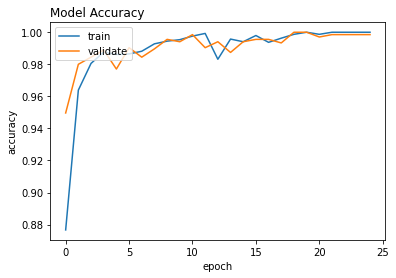

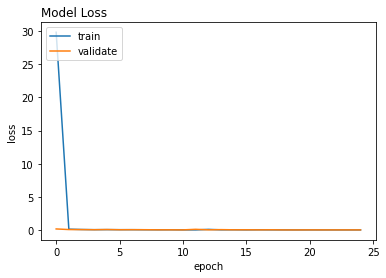

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# graph accuracy
#model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/COVID/models/alex_cov.hdf5')

plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title('Model Accuracy', loc='left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show();

#graph loss
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('Model Loss', loc='left')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(testy, yhat_classes)
# print('Accuracy: %f' % accuracy)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# precision tp / (tp + fp)
precision = precision_score(test_gen.classes, testpred, average= 'macro')
print('Precision: %f' % precision)


# recall: tp / (tp + fn)
recall = recall_score(test_gen.classes, testpred, average= 'macro')
print('Recall: %f' % recall)


# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_gen.classes, testpred, average= 'macro')
print('F1 score: %f' % f1)


Precision: 0.997368
Recall: 0.999667
F1 score: 0.998514


[[1499    1]
 [   0  189]]


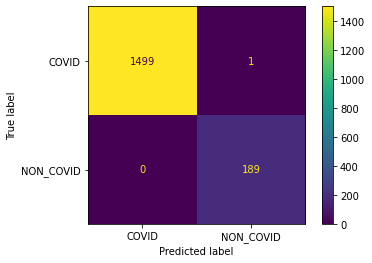

In [ ]:

# confusion matrix
matrix = confusion_matrix(test_gen.classes, testpred)
print(matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['COVID','NON_COVID'])

cm_display.plot()
plt.show()


#test_generator.class_indices.keys()

In [ ]:
#VGG-16


train_datagen = ImageDataGenerator(dtype='float32')
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (224,244),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32')
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (224,224),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32')
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (224,224),
                                                   class_mode = 'categorical')

Found 5400 images belonging to 2 classes.
Found 1689 images belonging to 2 classes.
Found 1350 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))




58889256/58889256 [==============================] - 2s 0us/step


In [ ]:

from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(256, activation='relu')
dropout = layers.Dropout(0.5)
prediction_layer = layers.Dense(N_CLASSES, activation='softmax')


vgg16_model = models.Sequential([
    vgg16,
    flatten_layer,
    dense_layer_1,
    dropout,
    prediction_layer
])


In [ ]:
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001)
vgg16_model.compile(optimizer=adam_optimizer, 
                     loss='categorical_crossentropy',
                     metrics=['accuracy']) #need to update to use f1 score too

In [ ]:
#model.compile(optimizer = tensorflow.keras.optimizers.Adam(1e-5), loss = 'categorical_crossentropy', metrics = ['acc'])
# Defining callbacks
filepath = '/content/drive/MyDrive/Datasets/COVID/models/vgg16_cov.hdf5'

early_stopping = EarlyStopping(monitor = 'val_loss', 
                              mode = 'min' , 
                              patience = 15)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_loss', 
                                mode='min', 
                                save_best_only=True, 
                                verbose = 1)

callback_list = [early_stopping, checkpoint]

In [ ]:
history_model = vgg16_model.fit(train_generator,
                               epochs = 20,
                               verbose = 1,
                               validation_data = valid_generator,
                               callbacks = [checkpoint, early_stopping])


Epoch 1/20
85/85 [==============================] - ETA: 0s - loss: 2.6580 - accuracy: 0.8674
Epoch 1: val_loss improved from inf to 0.96925, saving model to /content/drive/MyDrive/Datasets/COVID/models/vgg16_cov.hdf5
85/85 [==============================] - 61s 630ms/step - loss: 2.6580 - accuracy: 0.8674 - val_loss: 0.9692 - val_accuracy: 0.9385
Epoch 2/20
85/85 [==============================] - ETA: 0s - loss: 0.9939 - accuracy: 0.9246
Epoch 2: val_loss improved from 0.96925 to 0.64410, saving model to /content/drive/MyDrive/Datasets/COVID/models/vgg16_cov.hdf5
85/85 [==============================] - 45s 532ms/step - loss: 0.9939 - accuracy: 0.9246 - val_loss: 0.6441 - val_accuracy: 0.9519
Epoch 3/20
85/85 [==============================] - ETA: 0s - loss: 0.5418 - accuracy: 0.9474
Epoch 3: val_loss improved from 0.64410 to 0.39122, saving model to /content/drive/MyDrive/Datasets/COVID/models/vgg16_cov.hdf5
85/85 [==============================] - 48s 559ms/step - loss: 0.5418 - a

In [ ]:
from sklearn.metrics import accuracy_score
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/COVID/models/vgg16_cov.hdf5')

pred_datagen = ImageDataGenerator(dtype='float32')
pred_generator = pred_datagen.flow_from_directory(valid_path,
                                            batch_size = BATCH_SIZE,
                                            target_size=(224,224),
                                            class_mode = 'categorical', 
                                            shuffle=False)
model_pred = model.predict(pred_generator)
pred = []
for i in model_pred:
  pred.append(np.argmax(i))

accuracy_score(pred_generator.classes, pred)


Found 1350 images belonging to 2 classes.
22/22 [==============================] - 10s 414ms/step


0.9822222222222222

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/COVID/models/vgg16_cov.hdf5')

test_datagen = ImageDataGenerator(dtype='float32')
test_generator = test_datagen.flow_from_directory(test_path,
                                            batch_size = BATCH_SIZE,
                                            target_size=(224,224),
                                            class_mode = 'categorical', 
                                            shuffle=False)
test_pred = model.predict(test_generator)
testpred = []
for i in test_pred:
  testpred.append(np.argmax(i))

accuracy_score(test_generator.classes, testpred)



Found 1689 images belonging to 2 classes.
27/27 [==============================] - 14s 516ms/step


0.9863824748371818

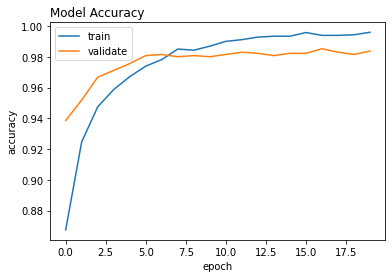

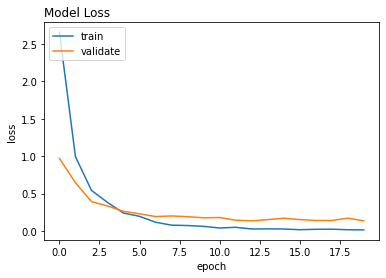

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# graph accuracy
#model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/COVID/models/vgg16_cov.hdf5')

plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title('Model Accuracy', loc='left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show();

#graph loss
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('Model Loss', loc='left')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [ ]:
# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(testy, yhat_classes)
# print('Accuracy: %f' % accuracy)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# precision tp / (tp + fp)
precision = precision_score(test_generator.classes, testpred, average= 'macro')
print('Precision: %f' % precision)


# recall: tp / (tp + fn)
recall = recall_score(test_generator.classes, testpred, average= 'macro')
print('Recall: %f' % recall)


# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_generator.classes, testpred, average= 'macro')
print('F1 score: %f' % f1)

Precision: 0.984687
Recall: 0.946090
F1 score: 0.964332


[[1497    3]
 [  20  169]]


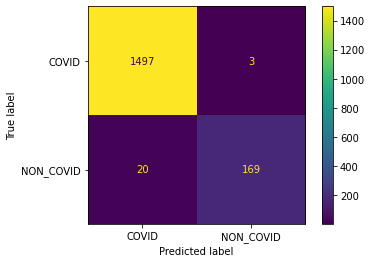

In [ ]:

# # kappa
# kappa = cohen_kappa_score(testy, yhat_classes)
# print('Cohens kappa: %f' % kappa)


# # ROC AUC
# auc = roc_auc_score(testy, yhat_probs)
# print('ROC AUC: %f' % auc)

from sklearn.metrics import confusion_matrix
from sklearn import metrics

# confusion matrix
matrix = confusion_matrix(test_generator.classes, testpred)
print(matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['COVID', 'NON_COVID'])

cm_display.plot()
plt.show()


#test_generator.class_indices.keys()

In [ ]:
# DETECTION - USER OPERATED - ALEXNET MODEL

import cv2
import tensorflow as tf
import numpy as np
from google.colab import files

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/COVID/models/alex_cov.hdf5')

# Define the classes
classes = ['COVID', 'NON_COVID']

# Browse for the test image
uploaded = files.upload()

# Loop through all the uploaded images
for image_path in uploaded.keys():
  # Load the test image and preprocess it
  image = cv2.imread(image_path)
  image = cv2.resize(image, (224, 224))
  image = np.expand_dims(image, axis=0)

  # Predict the label of the test image
  predictions = model.predict(image)
  predicted_class = np.argmax(predictions)

  # Print the predicted class
  print(f"Image '{image_path}': Predicted class: {classes[predicted_class]}")



Saving Non-COVID-19_032.png to Non-COVID-19_032.png
Saving Non-COVID-19_461.png to Non-COVID-19_461.png
Saving Non-COVID-19_645.png to Non-COVID-19_645.png
Saving Non-COVID-19_649.png to Non-COVID-19_649.png
Saving Non-COVID-19_919.png to Non-COVID-19_919.png
1/1 [==============================] - 0s 95ms/step
Image 'Non-COVID-19_032.png': Predicted class: NON_COVID
1/1 [==============================] - 0s 20ms/step
Image 'Non-COVID-19_461.png': Predicted class: NON_COVID
1/1 [==============================] - 0s 22ms/step
Image 'Non-COVID-19_645.png': Predicted class: NON_COVID
1/1 [==============================] - 0s 18ms/step
Image 'Non-COVID-19_649.png': Predicted class: NON_COVID
1/1 [==============================] - 0s 19ms/step
Image 'Non-COVID-19_919.png': Predicted class: NON_COVID


In [ ]:
# DETECTION - USER OPERATED - VGG16 MODEL

import cv2
import tensorflow as tf
import numpy as np
from google.colab import files

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/COVID/models/vgg16_cov.hdf5')

# Define the classes
classes = ['COVID', 'NON_COVID']

# Browse for the test image
uploaded = files.upload()

# Loop through all the uploaded images
for image_path in uploaded.keys():
  # Load the test image and preprocess it
  image = cv2.imread(image_path)
  image = cv2.resize(image, (224, 224))
  image = np.expand_dims(image, axis=0)

  # Predict the label of the test image
  predictions = model.predict(image)
  predicted_class = np.argmax(predictions)

  # Print the predicted class
  print(f"Image '{image_path}': Predicted class: {classes[predicted_class]}")



Saving COVID-19_0050.png to COVID-19_0050.png
Saving COVID-19_1213.png to COVID-19_1213.png
Saving COVID-19_1231.png to COVID-19_1231.png
Saving COVID-19_2725.png to COVID-19_2725.png
Saving COVID-19_2760.png to COVID-19_2760.png
Saving COVID-19_2811.png to COVID-19_2811.png
Saving COVID-19_5366.png to COVID-19_5366.png
Saving COVID-19_6200.png to COVID-19_6200.png
Saving COVID-19_7139.png to COVID-19_7139.png
1/1 [==============================] - 0s 151ms/step
Image 'COVID-19_0050.png': Predicted class: COVID
1/1 [==============================] - 0s 22ms/step
Image 'COVID-19_1213.png': Predicted class: COVID
1/1 [==============================] - 0s 23ms/step
Image 'COVID-19_1231.png': Predicted class: COVID
1/1 [==============================] - 0s 26ms/step
Image 'COVID-19_2725.png': Predicted class: COVID
1/1 [==============================] - 0s 24ms/step
Image 'COVID-19_2760.png': Predicted class: COVID
1/1 [==============================] - 0s 23ms/step
Image 'COVID-19_2811.pn